### Histogram of all transect points using .txt files produced by Sandwich_compare_DEM_minus_transect.ipynb

In [3]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import os
%matplotlib inline

path ='D:\\crs\\proj\\2015_Sandwich\\2017_Karen_Sandwich_maps\\trans_diff' # use your path
allFiles = glob.glob(os.path.join(path,"*.txt"))
print(allFiles)

['D:\\crs\\proj\\2015_Sandwich\\2017_Karen_Sandwich_maps\\trans_diff\\2016-01-22_SandwichTNB.txt', 'D:\\crs\\proj\\2015_Sandwich\\2017_Karen_Sandwich_maps\\trans_diff\\2016-02-11_SandwichTNB.txt', 'D:\\crs\\proj\\2015_Sandwich\\2017_Karen_Sandwich_maps\\trans_diff\\2016-03-30_SandwichTNB.txt', 'D:\\crs\\proj\\2015_Sandwich\\2017_Karen_Sandwich_maps\\trans_diff\\2016-09-21_SandwichTNB.txt', 'D:\\crs\\proj\\2015_Sandwich\\2017_Karen_Sandwich_maps\\trans_diff\\2017-01-09_SandwichTNB.txt', 'D:\\crs\\proj\\2015_Sandwich\\2017_Karen_Sandwich_maps\\trans_diff\\2017-01-25_SandwichTNB.txt', 'D:\\crs\\proj\\2015_Sandwich\\2017_Karen_Sandwich_maps\\trans_diff\\2017-02-14_SandwichTNB.txt', 'D:\\crs\\proj\\2015_Sandwich\\2017_Karen_Sandwich_maps\\trans_diff\\2017-03-16_SandwichTNB.txt', 'D:\\crs\\proj\\2015_Sandwich\\2017_Karen_Sandwich_maps\\trans_diff\\2017-05-04_SandwichTNB.txt', 'D:\\crs\\proj\\2015_Sandwich\\2017_Karen_Sandwich_maps\\trans_diff\\2017-09-18_SandwichTNB.txt']


In [4]:
df = pd.concat((pd.read_csv(f) for f in allFiles))
df

,Unnamed: 0,#X/Easting (m NAD83(2011) Zone 19N),Y/Northing (m NAD83(2011) Zone 19N),Z/Elevation (m NAVD88),"DEM (interp, m)",DEM_minus_trans (m)
0,0,376792.8012,4624911.706,6.5760,6.5256,-0.0504
1,1,376795.6191,4624914.309,6.6849,6.5913,-0.0936
2,2,376799.1375,4624918.084,6.5278,6.4692,-0.0586
3,3,376802.4701,4624922.167,6.3927,6.2715,-0.1212
4,4,376804.7718,4624925.299,6.2496,6.1724,-0.0772
5,5,376806.6299,4624927.373,5.7166,5.6756,-0.0410
6,6,376808.9123,4624930.271,5.0025,4.9774,-0.0251
7,7,376811.4519,4624933.617,4.1594,4.0914,-0.0680
8,8,376813.7792,4624936.864,3.3144,3.2464,-0.0680
9,9,376816.3710,4624940.507,2.5023,2.4743,-0.0280


In [6]:
print("\nStatistics for interpolated values:")
print(df['DEM_minus_trans (m)'].describe())
df=df[np.abs(df["DEM_minus_trans (m)"])<3.] 
print(df['DEM_minus_trans (m)'].describe())
e0 = 376488.; n0 = 4625200.
df=df[df["#X/Easting (m NAD83(2011) Zone 19N)"]>e0]
df=df[df["Y/Northing (m NAD83(2011) Zone 19N)"]<n0] 
print(df['DEM_minus_trans (m)'].describe())



Statistics for interpolated values:
count    2383.000000
mean        0.010344
std         0.083405
min        -1.099300
25%        -0.019600
50%         0.006500
75%         0.033350
max         1.248900
Name: DEM_minus_trans (m), dtype: float64
count    2383.000000
mean        0.010344
std         0.083405
min        -1.099300
25%        -0.019600
50%         0.006500
75%         0.033350
max         1.248900
Name: DEM_minus_trans (m), dtype: float64
count    2269.000000
mean        0.005592
std         0.079011
min        -1.099300
25%        -0.020400
50%         0.004300
75%         0.029700
max         1.248900
Name: DEM_minus_trans (m), dtype: float64


In [7]:
q95 = df.quantile(q=0.95, axis=0, numeric_only=True, interpolation='linear')['DEM_minus_trans (m)']
q5 = df.quantile(q=0.05, axis=0, numeric_only=True, interpolation='linear')['DEM_minus_trans (m)']
print("90 percent lie between {} and {}.".format(q95,q5))

90 percent lie between 0.09061999999999998 and -0.07836.


C:\Users\csherwood\AppData\Local\Continuum\miniconda3\envs\IOOS3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\csherwood\AppData\Local\Continuum\miniconda3\envs\IOOS3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


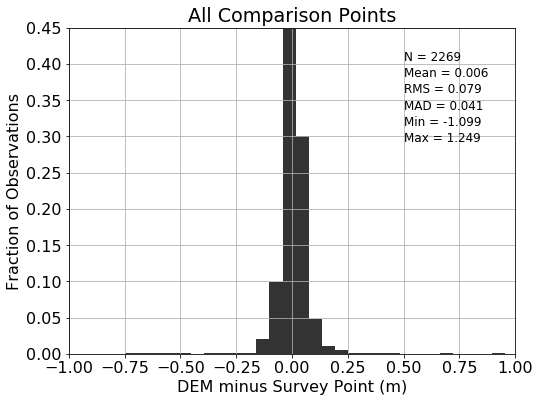

In [8]:
## Histogram of the data
dz = df['DEM_minus_trans (m)'].as_matrix()
dz = dz[~np.isnan(dz)]
dz = dz[np.abs(dz)<5.]

dzN = len(dz)
dzMAD = np.mean(np.abs(dz))
dzmean = dz.mean()
dzmin = dz.min()
dzmax = dz.max()
dzRMS = np.sqrt(np.mean(dz**2))

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)

fig = plt.figure(figsize=(8,6))
# next line must be combined with normed=False to get fractional distribution correct
weights = np.ones_like(dz)/float(len(dz))
n, bins, patches = plt.hist(dz, bins=40, weights=weights, normed=False, facecolor=(.2,.2,.2), alpha=1)
xaxmax = 1
xaxmin = -1
yaxmin = 0.
yaxmax = .45

plt.xlabel('DEM minus Survey Point (m)')
plt.ylabel('Fraction of Observations')
plt.title('All Comparison Points')
plt.axis([xaxmin, xaxmax, yaxmin, yaxmax])
plt.grid(True)
plt.text(.75*(xaxmax-xaxmin)+xaxmin,.9*(yaxmax-yaxmin)+yaxmin,'N = {}'.format(dzN), fontsize=12)
plt.text(.75*(xaxmax-xaxmin)+xaxmin,.85*(yaxmax-yaxmin)+yaxmin,'Mean = {:.3f}'.format(dzmean), fontsize=12)
plt.text(.75*(xaxmax-xaxmin)+xaxmin,.8*(yaxmax-yaxmin)+yaxmin,'RMS = {:.3f}'.format(dzRMS), fontsize=12)
plt.text(.75*(xaxmax-xaxmin)+xaxmin,.75*(yaxmax-yaxmin)+yaxmin,'MAD = {:.3f}'.format(dzMAD), fontsize=12)
plt.text(.75*(xaxmax-xaxmin)+xaxmin,.7 *(yaxmax-yaxmin)+yaxmin,'Min = {:.3f}'.format(dzmin), fontsize=12)
plt.text(.75*(xaxmax-xaxmin)+xaxmin,.65*(yaxmax-yaxmin)+yaxmin,'Max = {:.3f}'.format(dzmax), fontsize=12)
plt.show()

fig_name = os.path.join(path,"All_DEM_minus_transect_HIST.png")
fig.savefig(fig_name,dpi=200)

In [11]:
fn = "F:\\2018_Sandwich_Synthesis\\zmean.tif"
with rasterio.open(fn) as src:
    zmean = src.read(1)

C:\Users\csherwood\AppData\Local\Continuum\miniconda3\envs\IOOS3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\csherwood\AppData\Local\Continuum\miniconda3\envs\IOOS3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
xsize, ysize = 8000, 6800
dx = 0.1
dy = 0.1
e0 = 376488.; n0 = 4625200.
X,Y = np.meshgrid(np.linspace(e0,e0+xsize*dx,xsize),\
                  np.linspace(n0,n0-ysize*dy,ysize))
print(np.shape(X))
print(np.shape(zmean))
print(" Upper left: ",X[0][0],Y[0][0],'\n',"Lower right: ",X[-1][-1],Y[-1][-1])

(6800, 8000)
(6800, 8000)
 Upper left:  376488.0 4625200.0 
 Lower right:  377288.0 4624520.0


In [13]:
xt=X[0:-1:10,0:-1:10]
yt=Y[0:-1:10,0:-1:10]
zt=zmean[0:-1:10,0:-1:10]
Zm = np.ma.masked_where(np.isnan(zt),zt)
print(np.shape(zt))
print(zt)

(680, 800)
[[ 1.31534851  1.27639949  1.24518979 ...,         nan         nan
          nan]
 [ 1.37580538  1.34381652  1.30576622 ...,         nan         nan
          nan]
 [ 1.44193316  1.40568399  1.37313414 ...,         nan         nan
          nan]
 ..., 
 [        nan         nan         nan ...,         nan         nan
          nan]
 [        nan         nan         nan ...,         nan         nan
          nan]
 [        nan         nan         nan ...,         nan         nan
          nan]]


C:\Users\csherwood\AppData\Local\Continuum\miniconda3\envs\IOOS3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
C:\Users\csherwood\AppData\Local\Continuum\miniconda3\envs\IOOS3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


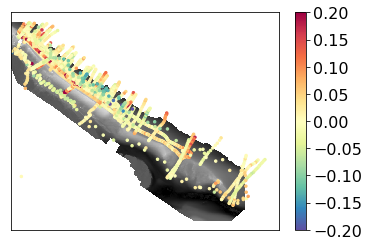

In [15]:
zt[zt<-10.]=np.nan
# a plot to check those coordinates
cmap=plt.cm.gray
fig = plt.figure()
plt.plot(figsize=(12,6))
#cmap.set_bad('grey')
plt.pcolormesh(xt,yt,zt,shading='flat',edgecolor=None,cmap=cmap,vmin=-2,vmax=8)
plt.axis('equal')
# make map of differences
dz = df['DEM_minus_trans (m)'].as_matrix()
x = df['#X/Easting (m NAD83(2011) Zone 19N)'].as_matrix()
y = df['Y/Northing (m NAD83(2011) Zone 19N)'].as_matrix()

#plt.imshow(z[::],cmap=plt.cm.gray,vmin=-2,vmax=13)
cmap=plt.cm.Spectral_r
plt.scatter(x,y,6,c=dz,vmin=-.2,vmax=.2,edgecolors='face',cmap=cmap)
plt.xticks([])
plt.yticks([])
#plt.xmin = e0
#plt.xmax = e0+680
#plt.ymin = n0-800
#plt.ymax = n0
plt.colorbar()

fig_name = os.path.join(path,"All_DEM_minus_transect_MAP.png")
fig.savefig(fig_name,dpi=200)